In [1]:
import pandas as pd 

In [2]:
reviews_df = pd.read_csv("D:/DataScience/train (2).csv")

reviews_df.head()

,ID,Review,Rating
0,0,exceptional service nice all-around daughter s...,5
1,1,beautiful relaxing jw marriott desert ridge re...,5
2,2,great location great location 5 mins subway ta...,5
3,3,"pleased nice safe hotel, flower market hotel v...",3
4,4,excellent hotel service great hotel excellent ...,4


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.utils.multiclass import unique_labels

In [4]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["Review"].apply(lambda x: clean_text(x))

In [5]:
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove

#ReviewParse: Takes the stubborn punctuation off the words for a single review
#Input: the review to parse
#Output: the parsed review
def reviewParse(review):
    splitReview = review.split() #Split the review into words
    parsedReview = "".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) #Takes the stubborn punctuation out
    return parsedReview #Returns the parsed review

reviews_df["review_clean"] = reviews_df["Review"].apply(reviewParse) #Parse all the reviews for their punctuation and add it into a new column
reviews_df.head() 

,ID,Review,Rating,review_clean
0,0,exceptional service nice all-around daughter s...,5,exceptional service nice allaround daughter st...
1,1,beautiful relaxing jw marriott desert ridge re...,5,beautiful relaxing jw marriott desert ridge re...
2,2,great location great location 5 mins subway ta...,5,great location great location 5 mins subway ta...
3,3,"pleased nice safe hotel, flower market hotel v...",3,pleased nice safe hotel flower market hotel va...
4,4,excellent hotel service great hotel excellent ...,4,excellent hotel service great hotel excellent ...


In [6]:
x = reviews_df["review_clean"]
y = reviews_df["Rating"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1,random_state=42)


In [8]:
x_train

4742     excellent value sacrificing checked hotel revi...
10029    great hotel fantastic small business meeting f...
11359    great hotel spent wonderful nights san juan ma...
9603     great service great club lounge 2412 2612 2712...
7824     great hotel stayed 4 nights monday friday grea...
                               ...                        
5191     lots good hotels florence donÇé stay paris hot...
13418    great pre stayed cruise rooms clean spacious c...
5390     thanks care son pleasure staying jk place janu...
860      best service fortunate stay luxury hotels past...
7270     overvalued rude staff crummy rooms disappointe...
Name: review_clean, Length: 12908, dtype: object

In [9]:
tvec = TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs', max_iter=1000)

model = Pipeline([('vectorizer', tvec), ('classifier', clf)])

In [10]:
model.fit(x_train, y_train)

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [11]:
y_pred = model.predict(x_test)

print(f'Accurcy: {accuracy_score(y_pred, y_test)}')
print(f'Precision: {precision_score(y_pred, y_test, average="weighted")}')
print(f'Recall: {recall_score(y_pred, y_test, average="weighted")}')

Accurcy: 0.6006968641114983
Precision: 0.6673348138877522
Recall: 0.6006968641114983


In [12]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,4), fontsize=12, model='clf'):
    """
    Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix,
    as a seaborn heatmap. 
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, ax=ax, fmt="d", cmap=plt.cm.Oranges)   
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

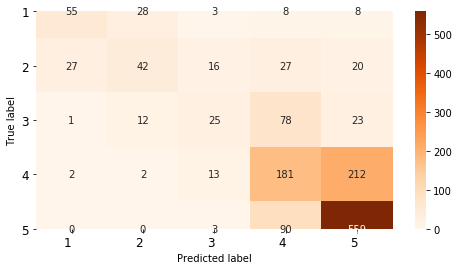

In [13]:
conf_mat = confusion_matrix(y_test, y_pred)
uniq_labels = unique_labels(y_test, y_pred)

print_confusion_matrix(conf_mat, uniq_labels)


In [14]:
# LABEL ENCODING

#EncodeLabel: encode the labels into 0, 1, and 2, back to the issue of explaining positive and extremely positive to a machine
#Input: the star rating
#Output: 0, 1, or 2 indicating rating positivity/negativity

def encodeLabel(label):
    if label == 5 or label == 4: #If the rating is generally positive
        return 2 #Give the rating a 2 for positive
    if label == 3: #If the rating is generally neutral
        return 1 #Give the rating a 1 for neutral
    return 0 #Give the rating a 0 for negative

labels = ["Negative", "Neutral", "Positive"] #Give our labels a name
reviews_df["EncodedRating"] = reviews_df["Rating"].apply(encodeLabel) #Encode the ratings to positivity labels

In [15]:
x1 = reviews_df["review_clean"]
y1 = reviews_df["EncodedRating"]

In [16]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=0.1,random_state=42)


In [17]:
x1_train

4742     excellent value sacrificing checked hotel revi...
10029    great hotel fantastic small business meeting f...
11359    great hotel spent wonderful nights san juan ma...
9603     great service great club lounge 2412 2612 2712...
7824     great hotel stayed 4 nights monday friday grea...
                               ...                        
5191     lots good hotels florence donÇé stay paris hot...
13418    great pre stayed cruise rooms clean spacious c...
5390     thanks care son pleasure staying jk place janu...
860      best service fortunate stay luxury hotels past...
7270     overvalued rude staff crummy rooms disappointe...
Name: review_clean, Length: 12908, dtype: object

In [18]:
model1 = Pipeline([('vectorizer', tvec), ('classifier', clf)])

In [19]:
model1.fit(x1_train, y1_train)

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [20]:
y1_pred = model1.predict(x1_test)


print(f'Accurcy: {accuracy_score(y1_pred, y1_test)}')
print(f'Precision: {precision_score(y1_pred, y1_test, average="weighted")}')
print(f'Recall: {recall_score(y1_pred, y1_test, average="weighted")}')

Accurcy: 0.8662020905923344
Precision: 0.9397345987580372
Recall: 0.8662020905923344


In [27]:
print(type(y1_pred))

<class 'numpy.ndarray'>


In [26]:
x1_test.head()

4830    tiny room great view weird bathroom cleanlines...
2442    best place stay san francisco great place stay...
5688    not bad reviews husband just returned breezes ...
1769    confortable clean cool hotel blocks north cath...
3860    good resort stayed gran bahia principe 41 48 b...
Name: review_clean, dtype: object

In [21]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,4), fontsize=12, model='clf'):
    """
    Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix,
    as a seaborn heatmap. 
    """
    df_cm1 = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    heatmap = sns.heatmap(df_cm1, annot=True, ax=ax, fmt="d", cmap=plt.cm.Oranges)   
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label1')
    plt.xlabel('Predicted label1')
    
    plt.show()

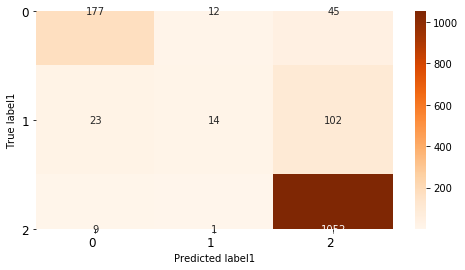

In [22]:
conf_mat = confusion_matrix(y1_test, y1_pred)
uniq_labels = unique_labels(y1_test, y1_pred)

print_confusion_matrix(conf_mat, uniq_labels)

In [23]:
import pickle

pickle_out = open("model.pkl","wb")
pickle.dump(model1, pickle_out)
pickle_out.close()